# Loading And Graphing Monthly Summaries

In [14]:
# Make the json_helper module available to this notebook.
import json_helper

In [5]:
# Using the json_helper module, load all of the json files acquired in part one of this lab into a Pandas DataFrame.
df_monthly_summaries = json_helper.read_all_json_files("data/monthly_summaries")

In [8]:
# Display a summary of the DataFrame
df_monthly_summaries.head()

,date,datatype,station,attributes,value,source
0,1938-01-01T00:00:00,TAVG,GHCND:USC00072625,",6",1.34,FIPS10003_avg_1938_to_1948.json
1,1938-01-01T00:00:00,TAVG,GHCND:USC00079605,"1,6",0.43,FIPS10003_avg_1938_to_1948.json
2,1938-02-01T00:00:00,TAVG,GHCND:USC00072625,",6",3.80,FIPS10003_avg_1938_to_1948.json
3,1938-02-01T00:00:00,TAVG,GHCND:USC00079605,",6",2.47,FIPS10003_avg_1938_to_1948.json
4,1938-03-01T00:00:00,TAVG,GHCND:USC00072625,",6",7.83,FIPS10003_avg_1938_to_1948.json


In [9]:
# How many stations are there?
# How many rows are associated with each DataFrame?
unique_stations = df_monthly_summaries['station'].nunique()
print("Number of unique stations:", unique_stations)

Number of unique stations: 5


# Narrow our analysis to station id: GHCND:USW00013781

https://www.ncdc.noaa.gov/cdo-web/api/v2/stations/GHCND:USC00071200

```json
{
    "elevation": 24.1,
    "mindate": "1948-01-01",
    "maxdate": "2019-12-05",
    "latitude": 39.6744,
    "name": "WILMINGTON NEW CASTLE CO AIRPORT, DE US",
    "datacoverage": 1,
    "id": "GHCND:USW00013781",
    "elevationUnit": "METERS",
    "longitude": -75.60567
}
```

In [10]:
# Create a DataFrame called "df_wilm_readings". 
# This DataFrame should only contain records associated with station id 'GHCND:USW00013781'.
df_wilm_readings = df_monthly_summaries[df_monthly_summaries['station'] == 'GHCND:USW00013781']

In [11]:
# Display a summary of the df_wilm_readings DataFrame.
df_wilm_readings.head()

,date,datatype,station,attributes,value,source
3,1948-01-01T00:00:00,TAVG,GHCND:USW00013781,",X",-3.67,FIPS10003_avg_1948_to_1958.json
7,1948-02-01T00:00:00,TAVG,GHCND:USW00013781,",X",-0.55,FIPS10003_avg_1948_to_1958.json
11,1948-03-01T00:00:00,TAVG,GHCND:USW00013781,",X",6.31,FIPS10003_avg_1948_to_1958.json
15,1948-04-01T00:00:00,TAVG,GHCND:USW00013781,",X",10.55,FIPS10003_avg_1948_to_1958.json
19,1948-05-01T00:00:00,TAVG,GHCND:USW00013781,",X",16.33,FIPS10003_avg_1948_to_1958.json


In [16]:
# Create a DataFrame called jan_readings.
# This DataFrame should filter the contents of df_wilm_readings in such a way that it only keeps records 
# which are associated with the month of January.
# Make sure that rows are sorted by date.
df_wilm_readings['date'] = pd.to_datetime(df_wilm_readings['date'])
jan_readings = df_wilm_readings[df_wilm_readings['date'].dt.month == 1]
jan_readings = jan_readings.sort_values(by='date')

<ipython-input-16-6fc6bbf78213>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wilm_readings['date'] = pd.to_datetime(df_wilm_readings['date'])


In [22]:
# What is the shape of jan_readings?
jan_readings.shape

(2, 6)

* Create a line graph which meets the following requirements:
* The x axis should represent the year.
* The y axis should represent the temperature in celsius.
* Each point should display the average temperature in celsius for a given year.
* At a minimum it should display data from 1938 to 2017. 
* Make sure to include the x and y labels. 
* Make sure that x and y ticks are readable. 

In [19]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [20]:
%matplotlib inline

[Text(0.5, 0, 'year'),
 Text(0, 0.5, 'temperature in celsius'),
 Text(0.5, 1.0, 'Temperatures')]

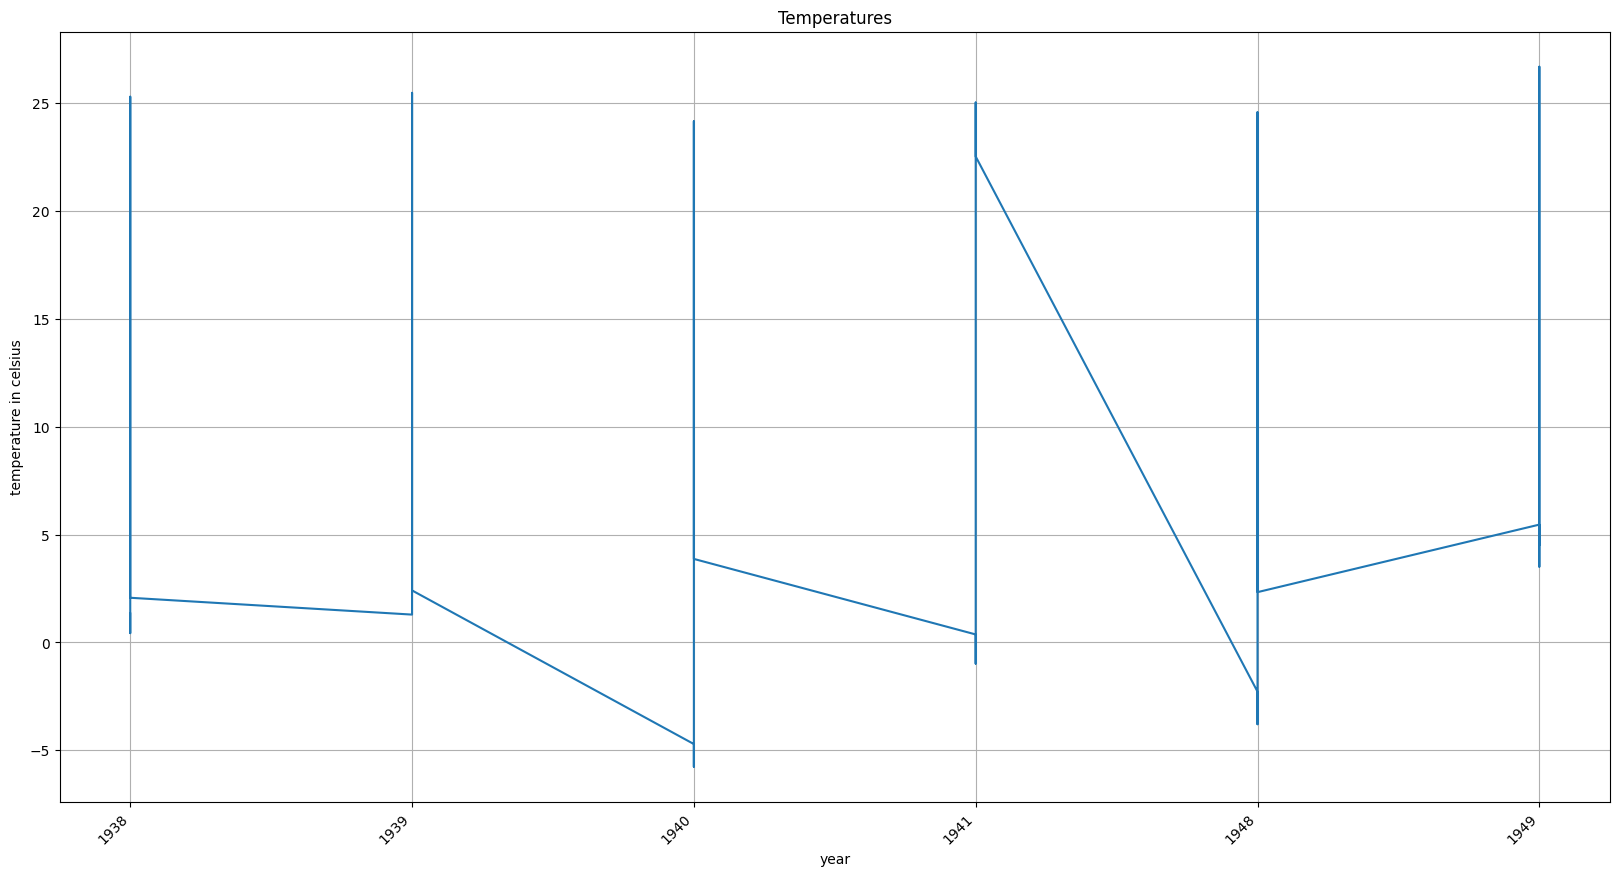

In [25]:
x = df_monthly_summaries['date'].str[:4]
y = df_monthly_summaries['value'] 

fig, ax = plt.subplots()
plt.xticks(rotation=45, fontsize=10, ha='right')
plt.yticks(fontsize=10)
fig.set_size_inches(20, 10)
ax.plot(x, y)
ax.grid()
ax.set(xlabel='year', ylabel='temperature in celsius', title='Temperatures')